```
This file is part of sscx-connectome-manipulations.

SPDX-License-Identifier: Apache-2.0
Copyright (c) 2024 Blue Brain Project/EPFL
```

# Figures related to SSCx connectome manipulations

## Part III: Benchmark figures

We demonstrate the applicability of our [Connectome-Manipulator](https://github.com/BlueBrain/connectome-manipulator) framework by manipulating the connectome of a detailed model of the rat somatosensory cortex (SSCx) and quantifying functional changes through network simulations.

ℹ️ This notebook reproduces the benchmark figures from [Pokorny et al. (2024)](https://doi.org/10.1101/2024.05.24.593860)

<u>Requirements</u>:
- Results from benchmarks (available on [Zenodo](https://zenodo.org/); see instructions in `README.md` on how to recompute)

In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

from matplotlib.ticker import NullLocator

In [2]:
# Set and create output figures folder
figs_path = './figs_benchm'
if not os.path.exists(figs_path):
    os.makedirs(figs_path)

## Strong scaling plot

The strong scaling benchmark shows how the overall computation time for rewiring a connectome scales with the number of processing units (CPUs). This is usually plotted in log-log scale.

ℹ️ Set results path below pointing to the location of the benchmark results

In [3]:
res_file = '/gpfs/bbp.cscs.ch/data/scratch/proj83/home/pokorny/Zenodo/SSCx-connectome-manipulation-data/benchmarks/runtimes_strong_scaling.csv'

In [4]:
runtimes = pd.read_csv(res_file)
runtimes = runtimes.groupby("processes").agg({"seconds": ["mean", "std"]})
runtimes.columns = ["seconds", "error"]
ranks, runtime = runtimes.index[0], runtimes.iloc[0]["seconds"]
runtimes["optimal_seconds"] = runtime * ranks / runtimes.index
runtimes

,seconds,error,optimal_seconds
processes,,,
4,18501.0,939.037805,18501.000000
8,9832.0,210.717821,9250.500000
16,5502.5,225.567063,4625.250000
32,3089.5,50.204581,2312.625000
64,1925.5,296.277741,1156.312500
128,1123.0,2.828427,578.156250
256,723.0,101.823376,289.078125
512,518.5,34.648232,144.539062


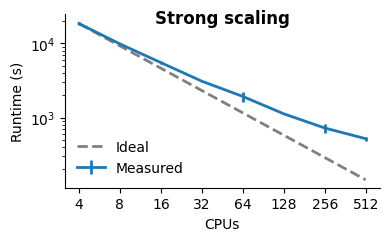

In [5]:
plt.figure(figsize=(4, 2.5))
plt.plot(runtimes.index, runtimes['optimal_seconds'], '--', color='grey', lw=2, label='Ideal')
plt.errorbar(runtimes.index, runtimes['seconds'], yerr=runtimes['error'], fmt='-', lw=2, label='Measured')
plt.gca().set_xscale('log')
plt.gca().set_yscale('log')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().xaxis.set_minor_locator(NullLocator())
plt.gca().set_xticks(runtimes.index, labels=runtimes.index)
plt.xlabel('CPUs')
plt.ylabel('Runtime (s)')
plt.title('Strong scaling', fontweight='bold', y=0.9)
plt.legend(loc='lower left', frameon=False)
plt.tight_layout()
plt.savefig(os.path.join(figs_path, 'strong_scaling.png'), dpi=600)
plt.savefig(os.path.join(figs_path, 'strong_scaling.svg'), dpi=600)
plt.show()

## Weak scaling plot

The weak scaling benchmark shows how the overall computation time for rewiring a connectome scales with different problem complexities, keeping the number of CPUs fixed. Different network sizes are used for different complexities. This is usually plotted in log-log scale.

ℹ️ Set results path below pointing to the location of the benchmark results

In [6]:
res_file = '/gpfs/bbp.cscs.ch/data/scratch/proj83/home/pokorny/Zenodo/SSCx-connectome-manipulation-data/benchmarks/runtimes_weak_scaling.csv'

In [7]:
runtimes = pd.read_csv(res_file)
print(f'{runtimes["processes"].unique()[0]} CPUs')
runtimes = runtimes.groupby("fraction").agg({"seconds": ["mean", "std"]})
runtimes.columns = ["seconds", "error"]
baseline, runtime = runtimes.index[-1], runtimes.iloc[-1]["seconds"]
runtimes["optimal_seconds"] = runtime / baseline * runtimes.index
runtimes

32 CPUs


,seconds,error,optimal_seconds
fraction,,,
0.125,470.00,93.843842,287.625
0.250,714.00,330.860494,575.250
0.500,985.75,295.792016,1150.500
1.000,2301.00,22.181073,2301.000


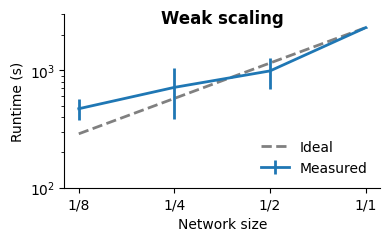

In [13]:
plt.figure(figsize=(4, 2.5))
plt.plot(runtimes.index, runtimes['optimal_seconds'], '--', color='grey', lw=2, label='Ideal')
plt.errorbar(runtimes.index, runtimes['seconds'], yerr=runtimes['error'], fmt='-', lw=2, label='Measured')
plt.gca().set_xscale('log')
plt.gca().set_yscale('log')
plt.ylim([100, 3000])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().xaxis.set_minor_locator(NullLocator())
plt.gca().set_xticks(runtimes.index, labels=[f'1/{1 / x:.0f}' for x in runtimes.index])
plt.xlabel('Network size')
plt.ylabel('Runtime (s)')
plt.title('Weak scaling', fontweight='bold', y=0.9)
plt.legend(loc='lower right', frameon=False)
plt.tight_layout()
plt.savefig(os.path.join(figs_path, 'weak_scaling.png'), dpi=600)
plt.savefig(os.path.join(figs_path, 'weak_scaling.svg'), dpi=600)
plt.show()

Finally, we will check the size of the nodesets used for this benchmark.

ℹ️ Set results path below pointing to the location of the benchmark results

In [9]:
nodesets_file = '/gpfs/bbp.cscs.ch/data/scratch/proj83/home/pokorny/Zenodo/SSCx-connectome-manipulation-data/benchmarks/nodesets_weak_scaling.json'

In [10]:
with open(nodesets_file, 'r') as f:
    nodesets = json.load(f)

In [11]:
names_sel = [f'NS{x}' for x in runtimes.index]
sizes_sel = [len(nodesets[nm]['node_id']) for nm in names_sel]

In [12]:
for n, s in list(zip(names_sel, sizes_sel))[::-1]:
    print(f'{n}: {s} neurons')

NS1.0: 30190 neurons
NS0.5: 15095 neurons
NS0.25: 7547 neurons
NS0.125: 3773 neurons
